# Hito 0 - App Reviewer (Cambiemosle el Nombre)

CC5205 - Minería de Datos

- Profesora: Jazmine Maldonado
- Auxiliar: Fran Zautzik

Integrantes:
- Felipe Avendaño
- Martín Bravo
- Franco González
- Daniel Radrigrán
- Felipe Valdebenito

## 1. Introducción

¿Cuál es el contexto general del tema/problema/datos de
estudio?¿Por qué podría ser interesante estudiar estos datos?

Los datos corresponden a revies de usuarios de aplicaciones de redes sociales. El estudio de estos datos es interesante porque nos permite ver que aspectos de las aplicaciones valoran los usuarios. Tambien nos permite entender porque no les gusta. Datos que son muy relevante para el desarrollo de nuevas redes sociales o mejoras de las ya existentes.

## 2. Exploración de Datos

 Características más relevantes e interesantes del
dataset (estadísticas de resumen, gráficos, etc.).

In [20]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import string # string manipulation
import re # regular expressions
import nltk # text manipulation

from tqdm import trange # progress bar
from nltk import tokenize # text manipulation
from nltk.corpus import stopwords # text manipulation
from nltk.stem import WordNetLemmatizer # text manipulation
from nltk.probability import FreqDist # text manipulation
from collections import Counter # text manipulation
from sklearn.feature_extraction.text import CountVectorizer # text manipulation

In [21]:
data = pd.read_csv("threads.csv")
data.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [23]:
data["rating"].value_counts()

rating
5    15559
1     9726
4     3244
3     2585
2     1796
Name: count, dtype: int64

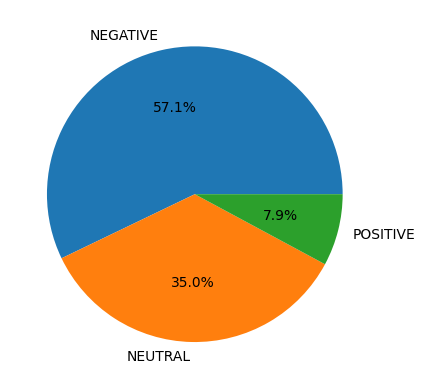

In [24]:
def ratingTransform(rating):
    if rating <= 2:
        return "NEGATIVE"
    elif rating == 3:
        return "NEUTRAL"
    else:
        return "POSITIVE"
    
data["rating"] = data["rating"].apply(ratingTransform)
plt.pie(data["rating"].value_counts(), labels=data["rating"].unique().tolist(), autopct='%1.1f%%')
plt.show() 

In [25]:
lenght = len(data['review_description'][0])
print(f'Length of a sample review: {lenght}')

data['Length'] = data['review_description'].str.len()
data.head(10)

Length of a sample review: 465


,source,review_description,rating,review_date,Length
0,Google Play,Meh. Not the greatest experience on a Chromebo...,NEGATIVE,2023-07-08 14:18:24,465
1,Google Play,Pretty good for a first launch!! Its easy to u...,NEUTRAL,2023-07-19 20:52:48,475
2,Google Play,"For a brand new app, it's very well optimized....",NEUTRAL,2023-07-06 23:03:11,497
3,Google Play,"Great app with a lot of potential! However, th...",NEUTRAL,2023-07-10 00:53:25,487
4,Google Play,"The app is good, but it needs a lot of functio...",NEUTRAL,2023-07-06 16:57:43,426
5,Google Play,"Currently, it's very challenging to use. It's ...",NEGATIVE,2023-07-18 22:30:10,386
6,Google Play,I still don’t want to see content from people ...,NEGATIVE,2023-07-19 19:35:31,438
7,Google Play,Could be great if all pages loaded when you cl...,NEGATIVE,2023-07-06 14:35:15,365
8,Google Play,I'm liking the concept! There is room for impr...,NEUTRAL,2023-07-09 03:27:39,416
9,Google Play,Not bad! This is its first launch. There is st...,POSITIVE,2023-07-06 23:41:13,328


In [26]:
word_count = data['review_description'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

def word_count(review):
    review_list = review.split()
    return len(review_list)

data['Word_count'] = data['review_description'].apply(word_count)
data.head(10)

Word count in a sample review: 85


,source,review_description,rating,review_date,Length,Word_count
0,Google Play,Meh. Not the greatest experience on a Chromebo...,NEGATIVE,2023-07-08 14:18:24,465,85
1,Google Play,Pretty good for a first launch!! Its easy to u...,NEUTRAL,2023-07-19 20:52:48,475,81
2,Google Play,"For a brand new app, it's very well optimized....",NEUTRAL,2023-07-06 23:03:11,497,91
3,Google Play,"Great app with a lot of potential! However, th...",NEUTRAL,2023-07-10 00:53:25,487,94
4,Google Play,"The app is good, but it needs a lot of functio...",NEUTRAL,2023-07-06 16:57:43,426,79
5,Google Play,"Currently, it's very challenging to use. It's ...",NEGATIVE,2023-07-18 22:30:10,386,75
6,Google Play,I still don’t want to see content from people ...,NEGATIVE,2023-07-19 19:35:31,438,81
7,Google Play,Could be great if all pages loaded when you cl...,NEGATIVE,2023-07-06 14:35:15,365,67
8,Google Play,I'm liking the concept! There is room for impr...,NEUTRAL,2023-07-09 03:27:39,416,86
9,Google Play,Not bad! This is its first launch. There is st...,POSITIVE,2023-07-06 23:41:13,328,55


In [27]:
data['mean_word_length'] = data['review_description'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
data.head(10)

,source,review_description,rating,review_date,Length,Word_count,mean_word_length
0,Google Play,Meh. Not the greatest experience on a Chromebo...,NEGATIVE,2023-07-08 14:18:24,465,85,4.482353
1,Google Play,Pretty good for a first launch!! Its easy to u...,NEUTRAL,2023-07-19 20:52:48,475,81,4.876543
2,Google Play,"For a brand new app, it's very well optimized....",NEUTRAL,2023-07-06 23:03:11,497,91,4.472527
3,Google Play,"Great app with a lot of potential! However, th...",NEUTRAL,2023-07-10 00:53:25,487,94,4.191489
4,Google Play,"The app is good, but it needs a lot of functio...",NEUTRAL,2023-07-06 16:57:43,426,79,4.405063
5,Google Play,"Currently, it's very challenging to use. It's ...",NEGATIVE,2023-07-18 22:30:10,386,75,4.160000
6,Google Play,I still don’t want to see content from people ...,NEGATIVE,2023-07-19 19:35:31,438,81,4.419753
7,Google Play,Could be great if all pages loaded when you cl...,NEGATIVE,2023-07-06 14:35:15,365,67,4.462687
8,Google Play,I'm liking the concept! There is room for impr...,NEUTRAL,2023-07-09 03:27:39,416,86,3.848837
9,Google Play,Not bad! This is its first launch. There is st...,POSITIVE,2023-07-06 23:41:13,328,55,4.981818


In [28]:
np.mean([len(sent) for sent in tokenize.sent_tokenize(data['review_description'][0])])
data['mean_sent_length'] = data['review_description'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
data.head(10)

,source,review_description,rating,review_date,Length,Word_count,mean_word_length,mean_sent_length
0,Google Play,Meh. Not the greatest experience on a Chromebo...,NEGATIVE,2023-07-08 14:18:24,465,85,4.482353,65.571429
1,Google Play,Pretty good for a first launch!! Its easy to u...,NEUTRAL,2023-07-19 20:52:48,475,81,4.876543,157.666667
2,Google Play,"For a brand new app, it's very well optimized....",NEUTRAL,2023-07-06 23:03:11,497,91,4.472527,70.142857
3,Google Play,"Great app with a lot of potential! However, th...",NEUTRAL,2023-07-10 00:53:25,487,94,4.191489,80.333333
4,Google Play,"The app is good, but it needs a lot of functio...",NEUTRAL,2023-07-06 16:57:43,426,79,4.405063,84.400000
5,Google Play,"Currently, it's very challenging to use. It's ...",NEGATIVE,2023-07-18 22:30:10,386,75,4.160000,47.375000
6,Google Play,I still don’t want to see content from people ...,NEGATIVE,2023-07-19 19:35:31,438,81,4.419753,86.800000
7,Google Play,Could be great if all pages loaded when you cl...,NEGATIVE,2023-07-06 14:35:15,365,67,4.462687,60.000000
8,Google Play,I'm liking the concept! There is room for impr...,NEUTRAL,2023-07-09 03:27:39,416,86,3.848837,40.700000
9,Google Play,Not bad! This is its first launch. There is st...,POSITIVE,2023-07-06 23:41:13,328,55,4.981818,46.000000


In [29]:
# type of data
data.dtypes

source                 object
review_description     object
rating                 object
review_date            object
Length                  int64
Word_count              int64
mean_word_length      float64
mean_sent_length      float64
dtype: object

['Length', 'Word_count', 'mean_word_length', 'mean_sent_length']



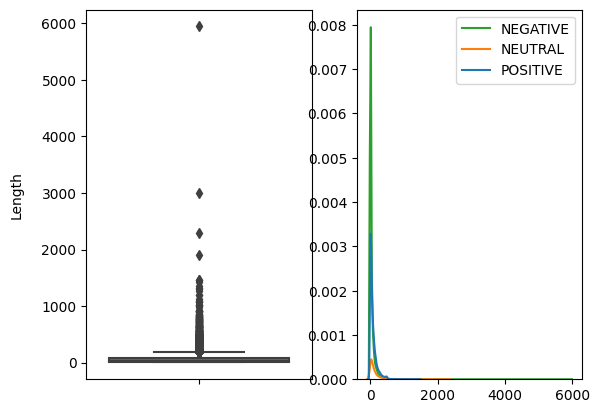

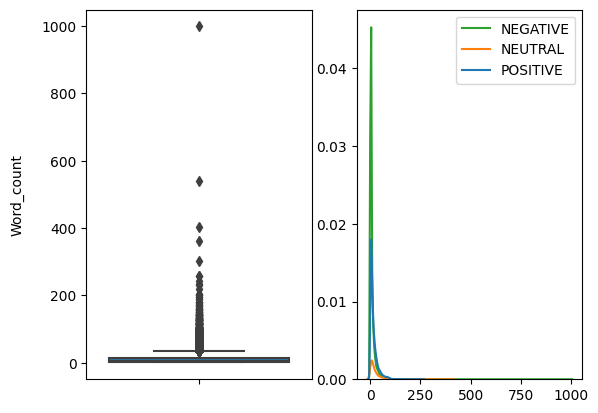

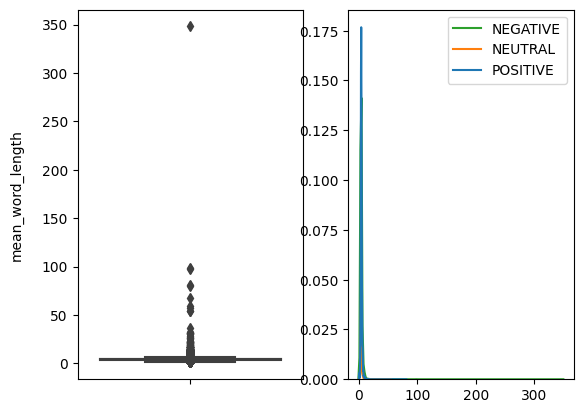

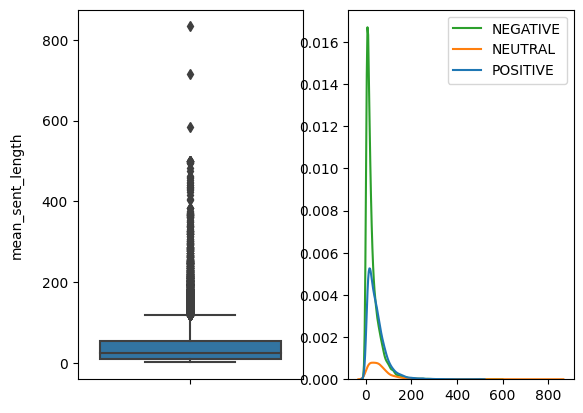

In [30]:
def visualize(col):
    
    print()
    plt.subplot(1,2,1)
    sns.boxplot(y=data[col], hue=data['rating'])
    plt.ylabel(col, labelpad=12.5)
    
    plt.subplot(1,2,2)
    sns.kdeplot(data=data, x=col, hue='rating')
    plt.legend(data['rating'].unique())
    plt.xlabel('')
    plt.ylabel('')
    
    plt.show()

features = data.columns.tolist()[4:]
print(features)
for feature in features:
    visualize(feature)

### Analisis de frecuencia de términos

aca usamos nltk para poner en minuscula, remover puntuaciones y stopwords,  de acuerdo al dialecto del inglés (la librería nos permite hacer todo esto)

In [31]:
def clean(review):
    
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
    
    return review

data['review_description'] = data['review_description'].apply(clean)

In [32]:
# asi queda
data['review_description'][0]


'meh greatest experience chromebook seems customized phones opens little screen cant expand resize - reasons complete mystery judging fact every app know resizeable seems like conscious choice developers youd something like beyond understanding suggests control freak approach great way make first impression'

pasamos las reviews a una lista de strings

In [33]:
def corpus(text):
    text_list = text.split()
    return text_list

data['review_lists'] = data['review_description'].apply(corpus)
data.head(10)

,source,review_description,rating,review_date,Length,Word_count,mean_word_length,mean_sent_length,review_lists
0,Google Play,meh greatest experience chromebook seems custo...,NEGATIVE,2023-07-08 14:18:24,465,85,4.482353,65.571429,"[meh, greatest, experience, chromebook, seems,..."
1,Google Play,pretty good first launch easy use self-explana...,NEUTRAL,2023-07-19 20:52:48,475,81,4.876543,157.666667,"[pretty, good, first, launch, easy, use, self-..."
2,Google Play,brand new app well optimized however missing q...,NEUTRAL,2023-07-06 23:03:11,497,91,4.472527,70.142857,"[brand, new, app, well, optimized, however, mi..."
3,Google Play,great app lot potential however lot needs fixe...,NEUTRAL,2023-07-10 00:53:25,487,94,4.191489,80.333333,"[great, app, lot, potential, however, lot, nee..."
4,Google Play,app good needs lot functionality example searc...,NEUTRAL,2023-07-06 16:57:43,426,79,4.405063,84.400000,"[app, good, needs, lot, functionality, example..."
5,Google Play,currently challenging use dark mode want chang...,NEGATIVE,2023-07-18 22:30:10,386,75,4.160000,47.375000,"[currently, challenging, use, dark, mode, want..."
6,Google Play,still dont want see content people dont specif...,NEGATIVE,2023-07-19 19:35:31,438,81,4.419753,86.800000,"[still, dont, want, see, content, people, dont..."
7,Google Play,could great pages loaded clicked sometimes don...,NEGATIVE,2023-07-06 14:35:15,365,67,4.462687,60.000000,"[could, great, pages, loaded, clicked, sometim..."
8,Google Play,im liking concept room improvement though ever...,NEUTRAL,2023-07-09 03:27:39,416,86,3.848837,40.700000,"[im, liking, concept, room, improvement, thoug..."
9,Google Play,bad first launch still room improvements would...,POSITIVE,2023-07-06 23:41:13,328,55,4.981818,46.000000,"[bad, first, launch, still, room, improvements..."


In [34]:
corpus = []
for i in trange(data.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += data['review_lists'][i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 32910/32910 [00:00<00:00, 559122.74it/s]


227522

10 palabras mas comunes

In [35]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('app', 10817),
 ('twitter', 5659),
 ('good', 4379),
 ('instagram', 3191),
 ('like', 3075),
 ('threads', 2966),
 ('nice', 2264),
 ('dont', 1945),
 ('account', 1895),
 ('better', 1770)]

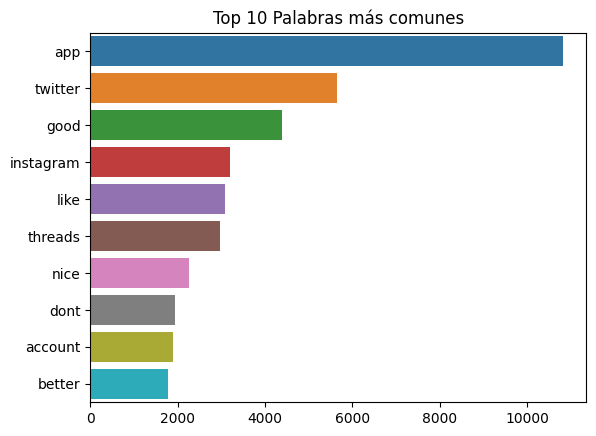

In [36]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

sns.barplot(x=freq, y=words)
plt.title('Top 10 Palabras más comunes')
plt.show()

### Los $N-$ gramas mas frecuentes

Los $N-$ gramas son secuencias de $N$ palabras consecutivas en un texto.

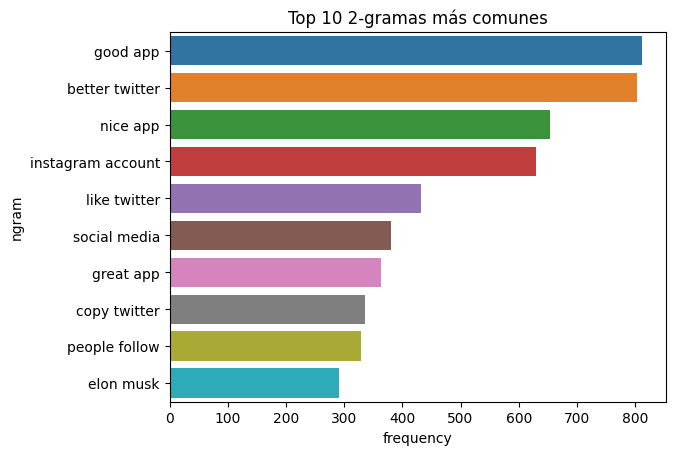

In [37]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(data['review_description'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 2-gramas más comunes')
plt.show()

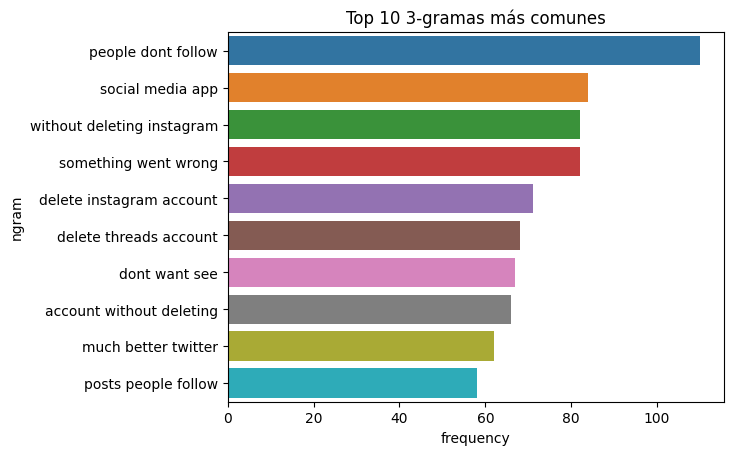

In [38]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(data['review_description'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 3-gramas más comunes')
plt.show()

## 3. Preguntas y Problemas

Dada la exploración anterior y su motivación original,
formular preguntas que se pueden responder mediante la minería de datos y que
se puedan vincular a la problemática planteada en la motivación.

Ejemplos:
1. ¿Es posible predecir la variable X en función de Y, Z, K?
2. ¿Existen grupos importantes de ejemplos que se comporten de
manera similar de acuerdo a algún criterio?
3. ¿Existen asociaciones frecuentes inesperadas entre grupos de
atributos?

1. ¿Existe una asociacion entre las personas que comparan threads con twiter y una puntuacion negativa?
2. ¿Es posible predecir si una reseña es positiva dado ciertos N-gramas?